# Import Library

In [155]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load Data

Penjelasan data tiap kolom:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [6]:
filepath = 'breast_cancer.csv'

In [96]:
df = pd.read_csv(filepath)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
for name in df.columns:
    print(f'total unique data column of {name}: {df[name].nunique()}')

total unique data column of id: 569
total unique data column of diagnosis: 2
total unique data column of radius_mean: 456
total unique data column of texture_mean: 479
total unique data column of perimeter_mean: 522
total unique data column of area_mean: 539
total unique data column of smoothness_mean: 474
total unique data column of compactness_mean: 537
total unique data column of concavity_mean: 537
total unique data column of concave points_mean: 542
total unique data column of symmetry_mean: 432
total unique data column of fractal_dimension_mean: 499
total unique data column of radius_se: 540
total unique data column of texture_se: 519
total unique data column of perimeter_se: 533
total unique data column of area_se: 528
total unique data column of smoothness_se: 547
total unique data column of compactness_se: 541
total unique data column of concavity_se: 533
total unique data column of concave points_se: 507
total unique data column of symmetry_se: 498
total unique data column of

### Drop Data Tidak Penting

In [11]:
print(f'total data sebelum drop column: {len(df.columns)}')
df = df.drop(columns=['id', 'Unnamed: 32'])
print(f'total data setelah drop column: {len(df.columns)}')

total data sebelum drop column: 33
total data setelah drop column: 31


### Ubah Data Label / Target Kedalam Data Numeric
Mengubah data dengan value 'Malignant' menjadi nilai 0 sedangkan value 'Benign' menjadi nilai 1

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [13]:
def diagnosis_numeric(x):
    if x == 'M':
        return 0
    elif x == 'B':
        return 1
    
df['diagnosis'] = df['diagnosis'].map(diagnosis_numeric)
df['diagnosis'].unique()

array([0, 1], dtype=int64)

# EDA

In [14]:
column_mean = df.loc[:, 'radius_mean':'fractal_dimension_mean'].columns
column_se = df.loc[:, 'radius_se':'fractal_dimension_se'].columns
column_worst = df.loc[:, 'radius_worst':'fractal_dimension_worst'].columns

### Perbandingan Data Malignant (0) dengan Benign (1)

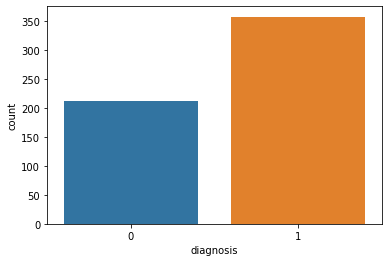

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['diagnosis'])
plt.show()

In [16]:
total_unique_diagnosis = df['diagnosis'].value_counts()
print(f'Data Benign lebih banyak {total_unique_diagnosis[1] - total_unique_diagnosis[0]} data dibandingkan Malignant')

Data Benign lebih banyak 145 data dibandingkan Malignant


### Distribusi Data Masing-Masing

#### Data Mean

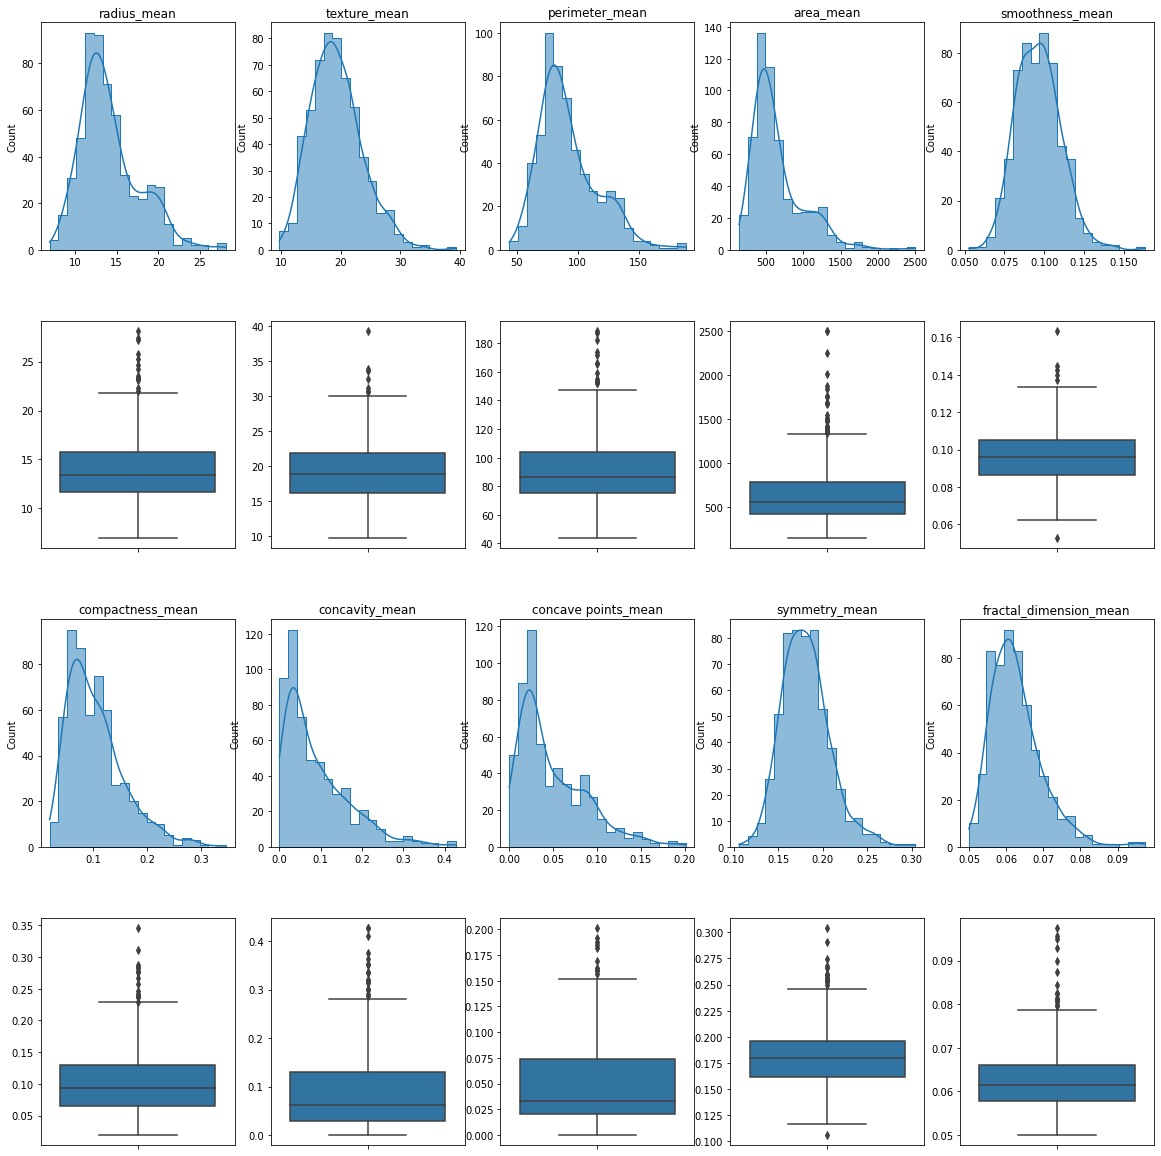

In [17]:
fig, ax = plt.subplots(4, 5, figsize=(16, 16))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

for index, name in enumerate(column_mean):
    histplot = sns.histplot(x=df[name], kde=True, element='step', bins=20,
                            ax=ax[index//5*2, index%5])
    histplot.set(title=name)
    histplot.set(xlabel=None)
    
    boxplot = sns.boxplot(y=df[name], ax=ax[index//5*2 + 1, index%5])
    boxplot.set(ylabel=None)

#### Data Standar Error

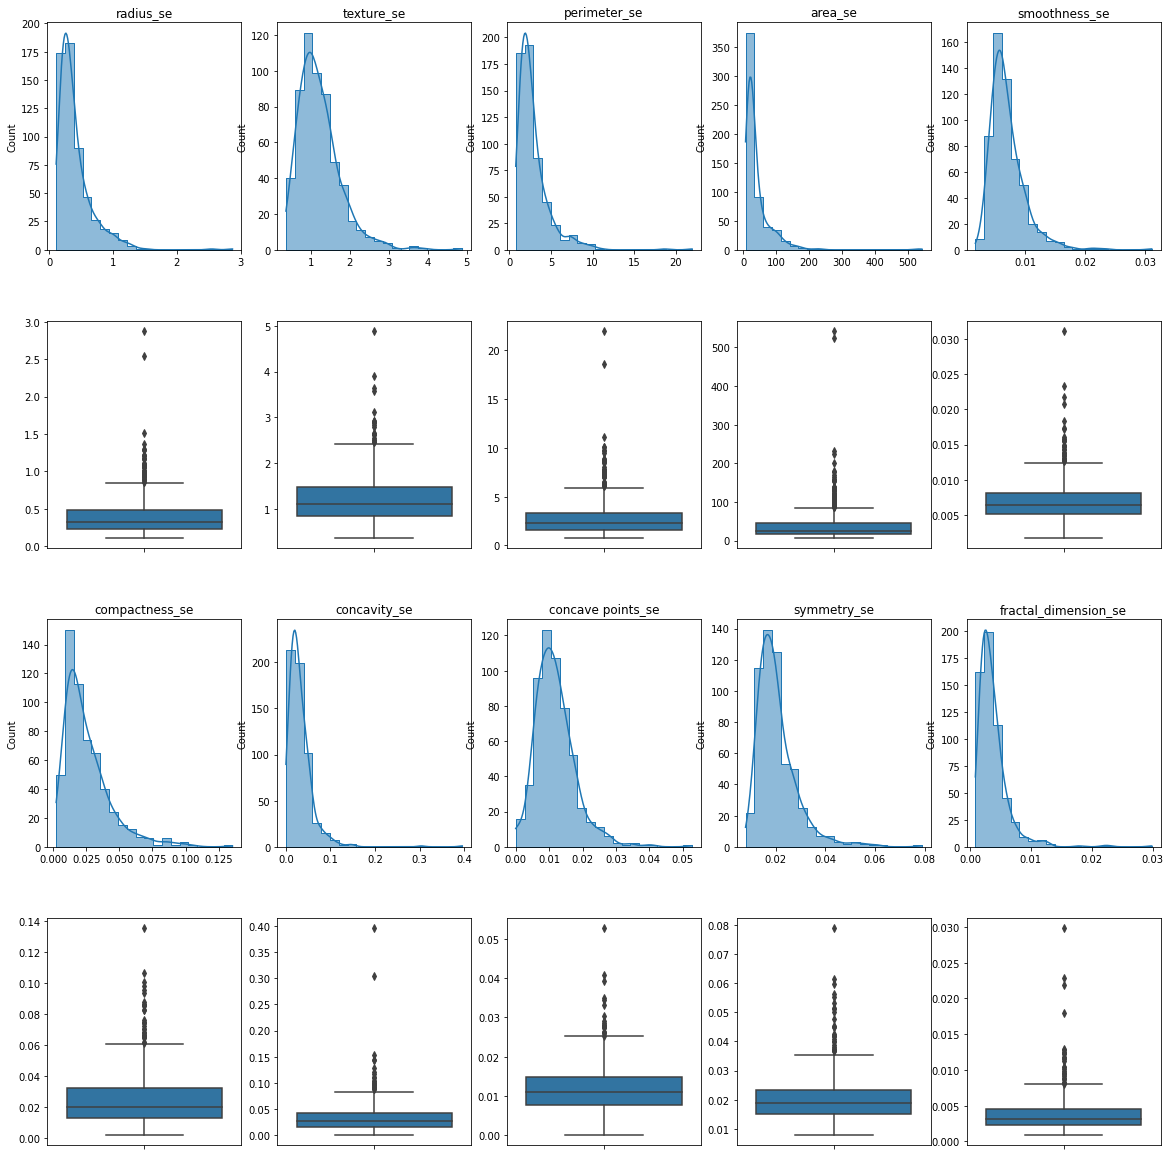

In [18]:
fig, ax = plt.subplots(4, 5, figsize=(16, 16))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

for index, name in enumerate(column_se):
    histplot = sns.histplot(x=df[name], kde=True, element='step', bins=20,
                            ax=ax[index//5*2, index%5])
    histplot.set(title=name)
    histplot.set(xlabel=None)
    
    boxplot = sns.boxplot(y=df[name], ax=ax[index//5*2 + 1, index%5])
    boxplot.set(ylabel=None)

#### Data Highest

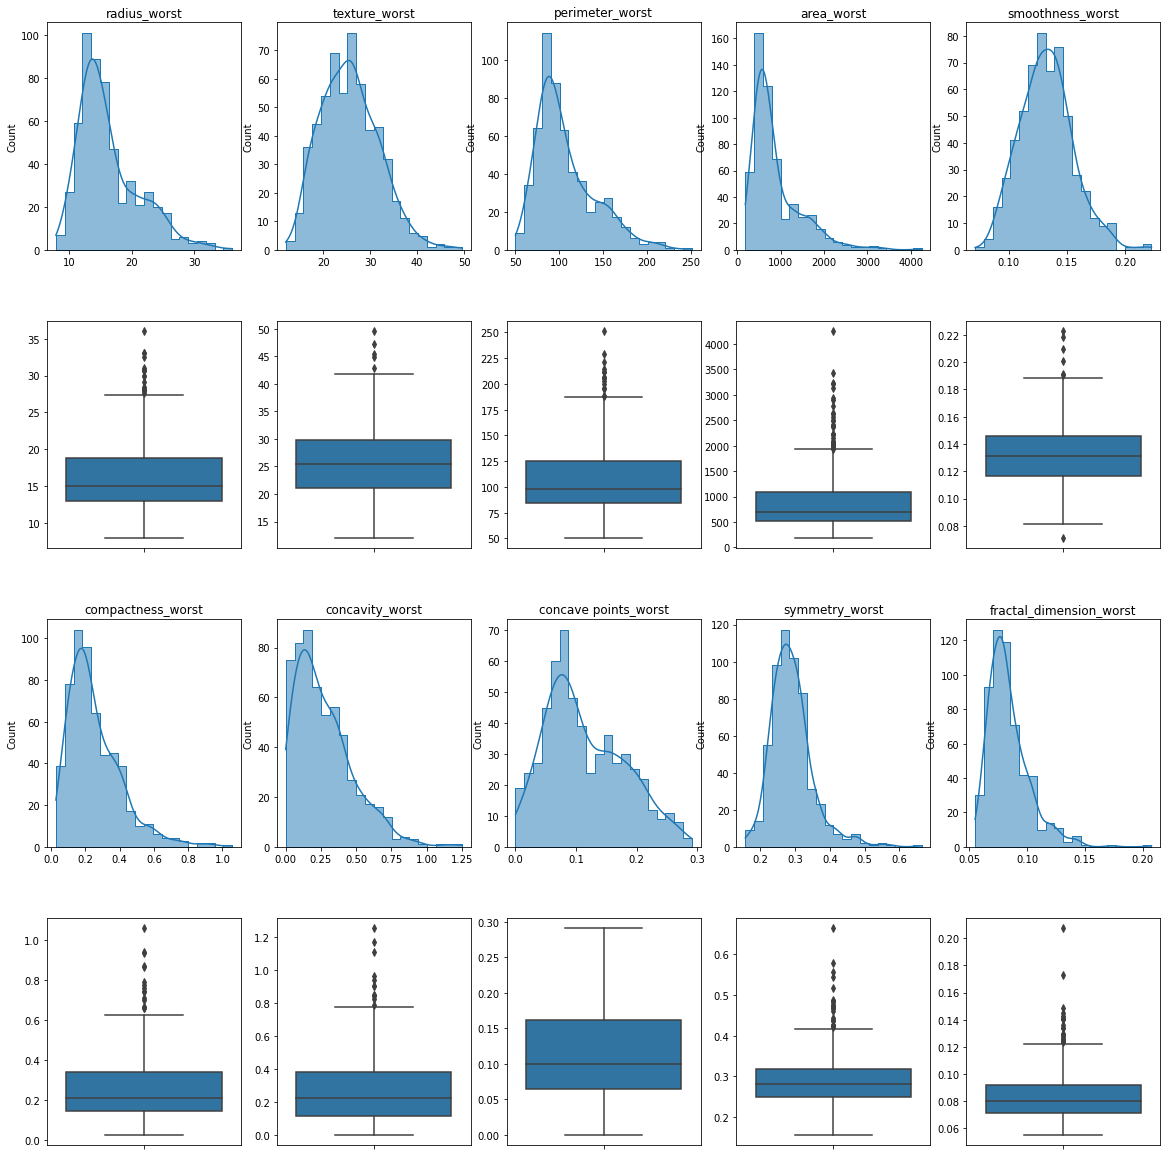

In [19]:
fig, ax = plt.subplots(4, 5, figsize=(16, 16))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

for index, name in enumerate(column_worst):
    histplot = sns.histplot(x=df[name], kde=True, element='step', bins=20,
                            ax=ax[index//5*2, index%5])
    histplot.set(title=name)
    histplot.set(xlabel=None)
    
    boxplot = sns.boxplot(y=df[name], ax=ax[index//5*2 + 1, index%5])
    boxplot.set(ylabel=None)

### Mengukur Korelasi Antar Data

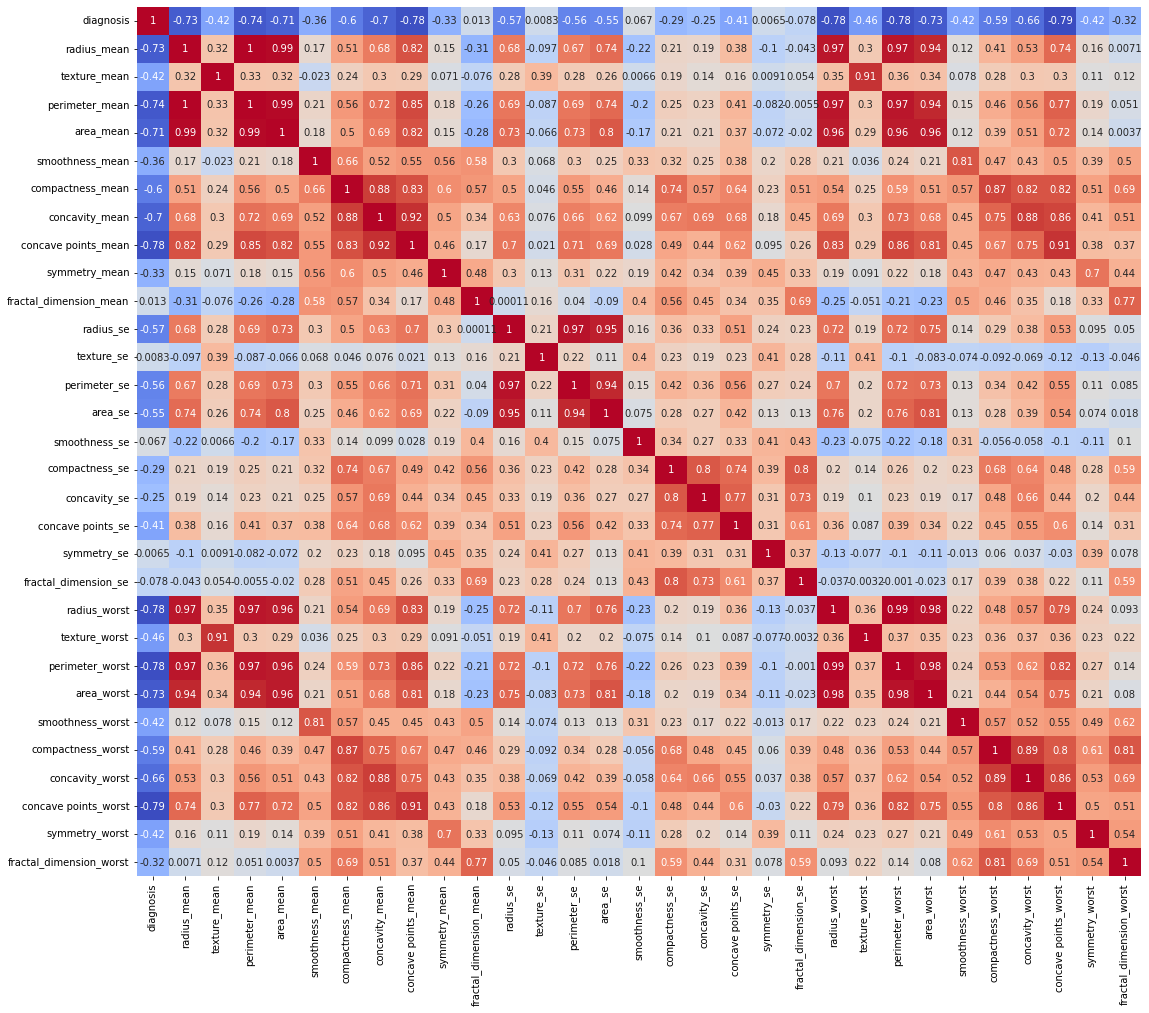

In [23]:
plt.figure(figsize=(18, 16))

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar=False)

plt.show()

# Data Processing

### Create Feature and Label Data

In [80]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [81]:
display(X.head())
display(y.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [82]:
df.shape

(569, 31)

### Oversampling Data

Melakukan oversampling data pada data benign untuk menyesuaikan jumlah distribusi data tiap label

Teknik oversampling yang digunakan yaitu SMOTE, dimana menduplikat data berdasarkan nilai feature yang saling berkaitan

In [83]:
oversample = SMOTE()

In [84]:
print(f'jumlah data sebelum menerapkan oversampling: {len(y)} (Malignant {y.value_counts()[0]} - Benign {y.value_counts()[1]})')

X, y = oversample.fit_resample(X, y)

print(f'jumlah data setelah menerapkan oversampling: {len(y)} (Malignant {y.value_counts()[0]} - Benign {y.value_counts()[1]})')

jumlah data sebelum menerapkan oversampling: 569 (Malignant 212 - Benign 357)
jumlah data setelah menerapkan oversampling: 714 (Malignant 357 - Benign 357)


### Scaling Data
Menggunakan Robust Scaler yang tidak terlalu terpengaruh pada outlier data.

Menggunakan data outlier dikarenakan data outlier tersebut merupakan data natural dari observasi data tersebut

In [85]:
print('Data sebelum dilakukan scaling:')
display(X.head())

scaler = RobustScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

print('Data setelah dilakukan scaling:')
display(X.head())

Data sebelum dilakukan scaling:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Data setelah dilakukan scaling:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.756340,-1.731319,0.867586,0.804975,1.124517,2.494019,1.859692,1.587595,1.794864,2.053008,...,1.239560,-1.049629,1.492892,1.605397,0.985563,2.108600,1.449219,1.319992,2.500875,1.834927
1,1.241752,-0.342592,1.144620,1.460495,-0.687848,-0.371510,0.006476,0.346088,0.008827,-0.572365,...,1.187715,-0.326895,1.002211,1.523350,-0.410800,-0.281620,-0.155216,0.579810,-0.182969,0.375581
2,1.076185,0.311369,1.065076,1.212406,0.650696,0.798840,0.966984,1.277743,0.765024,-0.176891,...,0.998948,-0.074889,0.882393,1.201671,0.338291,0.905506,0.557108,1.111175,1.068331,0.305251
3,-0.479768,0.147879,-0.372763,-0.435268,2.422139,2.584755,1.349449,0.911407,2.318612,4.284098,...,-0.152265,0.040416,-0.137576,-0.284692,2.716473,3.110097,1.363931,1.246346,5.454408,4.477183
4,1.189071,-0.987157,1.204965,1.402002,0.149954,0.408531,0.972200,0.896883,0.000000,-0.315068,...,0.862026,-1.128083,0.876688,1.027157,0.083745,-0.189803,0.385168,0.360739,-0.742647,-0.222223


### Menggunakan Data dengan Nilai Korelasi Besar Terhadap Data Diagnosis

data yang digunakan merupakan data dengan korelasi lebih besar dari 0.5 maupun kurang dari -0.5

In [86]:
diagnosis_corr = df.corr().iloc[1:, 0]
diagnosis_corr = diagnosis_corr.map(lambda x: np.abs(x))
diagnosis_corr = diagnosis_corr[np.where(diagnosis_corr > 0.5)[0]]
corr_column_name = diagnosis_corr.index
corr_column_name.values

array(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'], dtype=object)

In [89]:
X_selected = X[corr_column_name]
display(X_selected.head())
print(f'total data feature yang digunakan: {len(X_selected.columns)}')

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,0.756340,0.867586,0.804975,2.494019,1.859692,1.587595,2.365175,2.903249,3.020905,1.239560,1.492892,1.605397,2.108600,1.449219,1.319992
1,1.241752,1.144620,1.460495,-0.371510,0.006476,0.346088,0.597224,0.404573,1.094791,1.187715,1.002211,1.523350,-0.281620,-0.155216,0.579810
2,1.076185,1.065076,1.212406,0.798840,0.966984,1.277743,1.245099,0.975933,1.579234,0.998948,0.882393,1.201671,0.905506,0.557108,1.111175
3,-0.479768,-0.372763,-0.435268,2.584755,1.349449,0.911407,0.443671,0.427196,-0.042859,-0.152265,-0.137576,-0.284692,3.110097,1.363931,1.246346
4,1.189071,1.204965,1.402002,0.408531,0.972200,0.896883,1.282285,1.386522,1.589190,0.862026,0.876688,1.027157,-0.189803,0.385168,0.360739


total data feature yang digunakan: 15


### Splitting Data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(571, 15)
(571,)
(143, 15)
(143,)


# Modeling

### Membuat Model Logistic Regression

In [103]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Performa model dengan data training

Accuracy: 0.9527145359019265

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       281
           1       0.96      0.95      0.95       290

    accuracy                           0.95       571
   macro avg       0.95      0.95      0.95       571
weighted avg       0.95      0.95      0.95       571


Confusion Matrix:


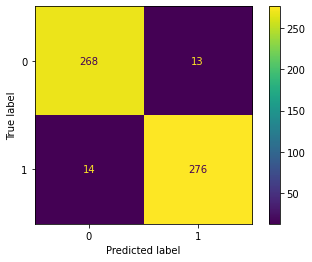

In [129]:
y_predict = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_train, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_train, y_predict)
plt.show()

#### Performa model dengan data testing

Accuracy: 0.916083916083916

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        76
           1       0.88      0.96      0.91        67

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143


Confusion Matrix:


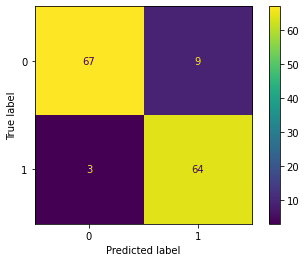

In [130]:
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_test, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

### Membuat Model KNN for Classification

In [132]:
model = KNeighborsClassifier(7, p=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=10)

#### Performa model dengan data training

Accuracy: 0.9492119089316988

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       281
           1       0.97      0.93      0.95       290

    accuracy                           0.95       571
   macro avg       0.95      0.95      0.95       571
weighted avg       0.95      0.95      0.95       571


Confusion Matrix:


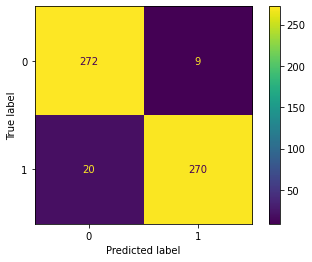

In [133]:
y_predict = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_train, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_train, y_predict)
plt.show()

#### Performa model dengan data testing

Accuracy: 0.9440559440559441

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        76
           1       0.92      0.97      0.94        67

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143


Confusion Matrix:


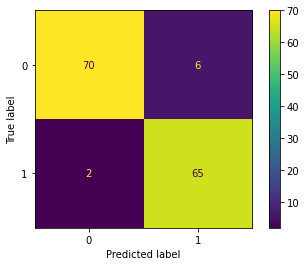

In [134]:
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_test, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

### Membuat Model SVC

In [152]:
model = SVC(kernel='poly', degree=2, C=100)
model.fit(X_train, y_train)

SVC(C=100, degree=2, kernel='poly')

#### Performa model dengan data training

Accuracy: 0.9369527145359019

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       281
           1       0.90      0.99      0.94       290

    accuracy                           0.94       571
   macro avg       0.94      0.94      0.94       571
weighted avg       0.94      0.94      0.94       571


Confusion Matrix:


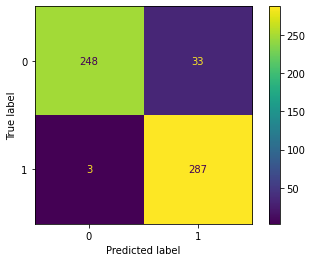

In [153]:
y_predict = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_train, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_train, y_predict)
plt.show()

#### Performa model dengan data testing

Accuracy: 0.8601398601398601

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85        76
           1       0.78      0.99      0.87        67

    accuracy                           0.86       143
   macro avg       0.88      0.87      0.86       143
weighted avg       0.89      0.86      0.86       143


Confusion Matrix:


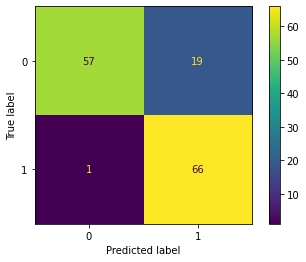

In [154]:
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_test, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

### Membuat Model SVC

In [173]:
model = RandomForestClassifier(100, criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

#### Performa model dengan data training

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00       290

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571


Confusion Matrix:


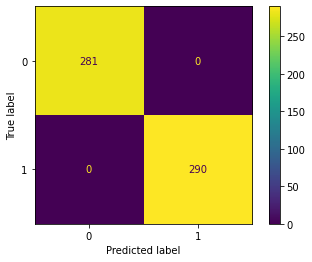

In [174]:
y_predict = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_train, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_train, y_predict)
plt.show()

#### Performa model dengan data testing

Accuracy: 0.9300699300699301

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        76
           1       0.90      0.96      0.93        67

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143


Confusion Matrix:


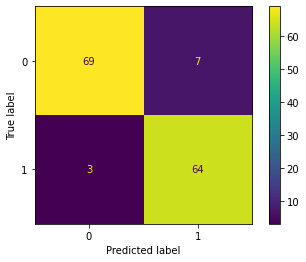

In [175]:
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:\n{classification_report(y_test, y_predict)}')
print(f'\nConfusion Matrix:')

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()